In [86]:
#This solution needs clearer understanding and proper evaluation

In [87]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [88]:
ur = pd.read_csv('Universities.csv')
ur3 = ur.copy()
ur.set_index('College Name', inplace = True)
ur3.set_index('College Name', inplace = True)

In [89]:
ur3['Public (1)/ Private (2)'] = ur3['Public (1)/ Private (2)'].astype('category')

In [90]:
ur3.dtypes

State                         object
Public (1)/ Private (2)     category
# appli. rec'd               float64
# appl. accepted             float64
# new stud. enrolled         float64
% new stud. from top 10%     float64
% new stud. from top 25%     float64
# FT undergrad               float64
# PT undergrad               float64
in-state tuition             float64
out-of-state tuition         float64
room                         float64
board                        float64
add. fees                    float64
estim. book costs            float64
estim. personal $            float64
% fac. w/PHD                 float64
stud./fac. ratio             float64
Graduation rate              float64
dtype: object

In [91]:
ur.head()

,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
College Name,,,,,,,,,,,,,,,,,,,
Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [92]:
ur.drop(['State', 'Public (1)/ Private (2)'], axis = 1, inplace = True)
ur3 = ur3[['State','Public (1)/ Private (2)']]

In [93]:
ur.isnull().sum()

# appli. rec'd               10
# appl. accepted             11
# new stud. enrolled          5
% new stud. from top 10%    235
% new stud. from top 25%    202
# FT undergrad                3
# PT undergrad               32
in-state tuition             30
out-of-state tuition         20
room                        321
board                       498
add. fees                   274
estim. book costs            48
estim. personal $           181
% fac. w/PHD                 32
stud./fac. ratio              2
Graduation rate              98
dtype: int64

In [94]:
ur.shape

(1302, 17)

In [95]:
#Remove all records with missing measurements from the dataset
ur.dropna(inplace = True)
ur3.dropna(inplace = True)

In [96]:
ur.isnull().sum()

# appli. rec'd              0
# appl. accepted            0
# new stud. enrolled        0
% new stud. from top 10%    0
% new stud. from top 25%    0
# FT undergrad              0
# PT undergrad              0
in-state tuition            0
out-of-state tuition        0
room                        0
board                       0
add. fees                   0
estim. book costs           0
estim. personal $           0
% fac. w/PHD                0
stud./fac. ratio            0
Graduation rate             0
dtype: int64

In [97]:
ur.head()

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
College Name,,,,,,,,,,,,,,,,,
Alaska Pacific University,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
University of Alaska Southeast,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
Birmingham-Southern College,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
Huntingdon College,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
Talladega College,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0


In [98]:
# scikit-learn uses population standard deviation
ur_norm = ur.apply(preprocessing.scale, axis=0)

# compute normalized distance
d_norm = pairwise.pairwise_distances(ur_norm, metric='euclidean')
pd.DataFrame(d_norm, columns=ur.index, index = ur.index).head(5)

College Name,Alaska Pacific University,University of Alaska Southeast,Birmingham-Southern College,Huntingdon College,Talladega College,University of Alabama at Birmingham,Arkansas College (Lyon College),Hendrix College,John Brown University,Harding University,...,Lawrence University,Ripon College,St. Norbert College,Viterbo College,University of Wisconsin-Stout,Univ. of Wisconsin at Eau Claire,Wisconsin Lutheran College,Alderson-Broaddus College,Marshall University,University of Wyoming
College Name,,,,,,,,,,,,,,,,,,,,,
Alaska Pacific University,0.000000,3.969389,5.614224,2.766945,3.685341,4.338573,4.280185,5.000057,4.306122,5.134442,...,5.547744,4.863001,5.278082,4.370434,5.584766,6.842222,3.529671,3.525789,4.488596,3.549653
University of Alaska Southeast,3.969389,0.000000,6.205403,3.313940,5.153839,5.416065,4.865992,5.826598,4.010787,5.896806,...,6.415731,5.392626,5.167819,3.732567,5.384862,6.702529,2.729592,3.489158,5.047409,4.673697
Birmingham-Southern College,5.614224,6.205403,0.000000,3.853408,5.601886,6.997113,2.629029,2.670217,3.507044,4.381796,...,2.496624,3.373907,2.870484,4.620009,5.950928,6.308576,4.612490,4.778002,5.703002,5.047150
Huntingdon College,2.766945,3.313940,3.853408,0.000000,4.107488,5.192787,3.097768,3.832729,2.119378,4.340681,...,4.069773,3.171206,3.471578,2.847500,4.680098,5.876585,1.938771,2.544709,4.524529,3.425216
Talladega College,3.685341,5.153839,5.601886,4.107488,0.000000,6.181225,4.294068,4.352880,4.508013,3.482159,...,5.523991,5.959428,5.211482,4.394888,5.096476,6.006461,4.283534,3.439585,4.016290,4.003575


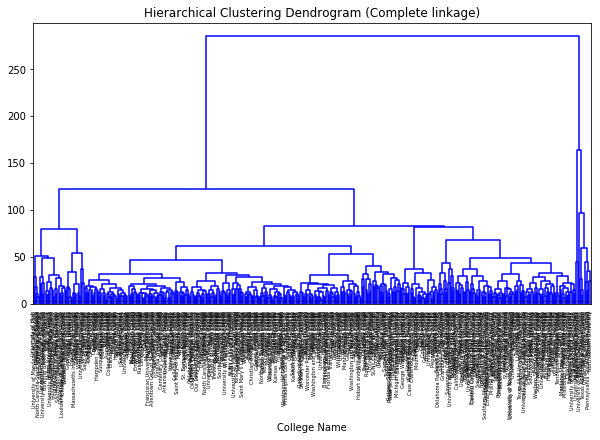

In [99]:
Z = linkage(d_norm, method='complete')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Complete linkage)')
plt.xlabel('College Name')
dendrogram(Z, labels=ur_norm.index, color_threshold=2.75)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

Two clusters seem reasonable for describing this data

In [100]:
memb = fcluster(linkage(ur_norm, 'complete'), 2, criterion='maxclust')
memb = pd.Series(memb, index=ur_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Alaska Pacific University, University of Alaska Southeast, Birmingham-Southern College, Huntingdon College, Talladega College, University of Alabama at Birmingham, Arkansas College (Lyon College), Hendrix College, John Brown University, Harding University, Northern Arizona University, California Polytechnic-San Luis, Claremont McKenna College, Harvey Mudd College, Pitzer College, Scripps College, Occidental College, Fresno Pacific College, Pepperdine University, Southern California College, St. Mary's College of California, University of San Francisco, Westmont College, Loyola Marymount University, Concordia University, Adams State College, Colorado College, Fort Lewis College, Mesa State College, University of Southern Colorado, Western State College of Colorado, Central Connecticut State University, Connecticut College, Sacred Heart University, Saint Joseph College, Trinity College, University of Bridgeport, University of Hartford, Wesleyan University, Eastern Connecticut State 

In [101]:
#numerical measurement
ur_norm.groupby(memb).mean()

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
1,-0.098278,-0.109123,-0.106327,-0.010980,-0.018769,-0.103791,-0.07344,0.013367,0.000920,-0.009711,-0.014154,-0.026299,-0.006239,-0.025705,-0.020761,-0.014736,0.001363
2,3.462418,3.844490,3.745974,0.386851,0.661246,3.656652,2.58733,-0.470927,-0.032417,0.342122,0.498654,0.926538,0.219811,0.905605,0.731414,0.519161,-0.048011


cluster 1 are universities with high tuition, low acceptance rate and also high graduation rate
cluster 2 are universities with low tuition, high acceptance rate and low graduation rate

In [102]:
#convert categorical variables in ur3 to dummy variables
ur3 = pd.get_dummies(ur3, drop_first = True)

In [103]:
ur3.columns

Index(['State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT',
       'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA',
       'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
       'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO',
       'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH',
       'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK',
       'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
       'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI',
       'State_WV', 'State_WY', 'Public (1)/ Private (2)_2'],
      dtype='object')

In [104]:
# scikit-learn uses population standard deviation
ur3_norm = ur3.apply(preprocessing.scale, axis=0)

# compute normalized distance
d3_norm = pairwise.pairwise_distances(ur3_norm, metric='euclidean')
pd.DataFrame(d3_norm, columns=ur3.index, index = ur3.index).head(5)

College Name,Alaska Pacific University,University of Alaska at Fairbanks,University of Alaska Southeast,University of Alaska at Anchorage,Alabama Agri. & Mech. Univ.,Faulkner University,University of Montevallo,Alabama State University,Auburn University-Main Campus,Birmingham-Southern College,...,University of Charleston,Salem-Teikyo University,Shepherd College,West Liberty State College,West Virginia Institute of Technology,West Virginia State College,West Virginia University,West Virginia Wesleyan College,Wheeling Jesuit College,University of Wyoming
College Name,,,,,,,,,,,,,,,,,,,,,
Alaska Pacific University,0.000000,2.082094,2.082094,2.082094,7.578568,7.286946,7.578568e+00,7.578568e+00,7.578568,7.286946,...,8.809169,8.809169,8.809169,9.051883,9.051883,9.051883,9.051883,8.809169,8.809169,36.157100
University of Alaska at Fairbanks,2.082094,0.000000,0.000000,0.000000,7.286946,7.578568,7.286946e+00,7.286946e+00,7.286946,7.578568,...,9.051883,9.051883,9.051883,8.809169,8.809169,8.809169,8.809169,9.051883,9.051883,36.097102
University of Alaska Southeast,2.082094,0.000000,0.000000,0.000000,7.286946,7.578568,7.286946e+00,7.286946e+00,7.286946,7.578568,...,9.051883,9.051883,9.051883,8.809169,8.809169,8.809169,8.809169,9.051883,9.051883,36.097102
University of Alaska at Anchorage,2.082094,0.000000,0.000000,0.000000,7.286946,7.578568,7.286946e+00,7.286946e+00,7.286946,7.578568,...,9.051883,9.051883,9.051883,8.809169,8.809169,8.809169,8.809169,9.051883,9.051883,36.097102
Alabama Agri. & Mech. Univ.,7.578568,7.286946,7.286946,7.286946,0.000000,2.082094,1.192093e-07,1.192093e-07,0.000000,2.082094,...,11.620506,11.620506,11.620506,11.432456,11.432456,11.432456,11.432456,11.620506,11.620506,36.825268


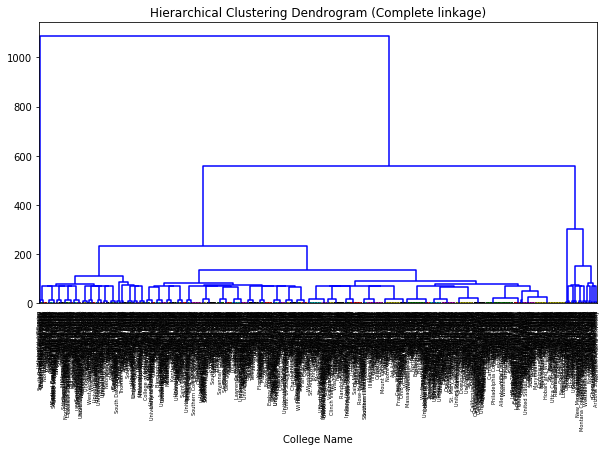

In [105]:
Z3 = linkage(d3_norm, method='complete')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Complete linkage)')
plt.xlabel('College Name')
dendrogram(Z3, labels=ur3_norm.index, color_threshold=2.75)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [106]:
memb = fcluster(linkage(ur3_norm, 'complete'), 2, criterion='maxclust')
memb = pd.Series(memb, index=ur3_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Alaska Pacific University, University of Alaska at Fairbanks, University of Alaska Southeast, University of Alaska at Anchorage, Alabama Agri. & Mech. Univ., Faulkner University, University of Montevallo, Alabama State University, Auburn University-Main Campus, Birmingham-Southern College, University of North Alabama, Huntingdon College, Jacksonville State University, Judson College, Livingston University, Miles College, University of Mobile, Oakwood College, Samford University, Spring Hill College, Stillman College, Talladega College, Troy State University at Troy, Tuskegee University, University of Alabama at Tuscaloosa, University of Alabama at Birmingham, University of Alabama at Huntsville, University of South Alabama, Auburn University at Montgomery, University of Arkansas at Monticello, University of Arkansas at Pine Bluff, Arkansas College (Lyon College), Arkansas Tech University, Arkansas State University, University of Central Arkansas, University of the Ozarks, Henderso

In [107]:
#categorical measurement
ur3_norm.groupby(memb).mean()

,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,...,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Public (1)/ Private (2)_2
1,0.000108,0.000088,0.000048,0.000183,0.000086,0.000094,0.000064,0.000048,0.000118,0.00013,...,0.000126,0.000169,0.000052,0.000137,0.000080,0.000086,0.000116,0.000088,-0.027724,0.001023
2,-0.139918,-0.115020,-0.062089,-0.238366,-0.111542,-0.121692,-0.083430,-0.062089,-0.153574,-0.16863,...,-0.163749,-0.219793,-0.068041,-0.178033,-0.104257,-0.111542,-0.150933,-0.115020,36.069378,-1.330493


Yes, there is a relationship between the clusters and the categorical information

What other external information can explain the contents of some or all of these clusters?

Consider Tufts University, which is missing some information. Compute the Euclidean distance of this record from each of the clusters that you found above (using only the measurements that you have). Which cluster is it closest to? Impute the missing values for Tufts by taking the average of the cluster on those measurements.

Input Tufts University as a dataframe and calculate its distance with both the continuous and categorical measurements. Check how to calculate Euclidean distance with python